In [2]:
%matplotlib inline

# Simple Oscillator Example

This example shows the most simple way of using a solver.
We solve free vibration of a simple oscillator:
$$m \ddot{u} + k u = 0,\quad u(0) = u_0,\quad \dot{u}(0) = \dot{u}_0$$
using the CVODE solver. An analytical solution exists, given by
$$u(t) = u_0 \cos\left(\sqrt{\frac{k}{m}} t\right)+\frac{\dot{u}_0}{\sqrt{\frac{k}{m}}} \sin\left(\sqrt{\frac{k}{m}} t\right)$$

In [3]:
from __future__ import print_function
import matplotlib.pyplot as plt
from numpy import asarray, cos, sin, sqrt, linspace
from scikits.odes import ode

In [4]:
#data of the oscillator
k = 4.0
m = 1.0
#initial position and speed data on t=0, x[0] = u, x[1] = \dot{u}, xp = \dot{x}
initx = [1, 0.1]

We need a first order system, so convert the second order system 
$$m \ddot{u} + k u = 0,\quad u(0) = u_0,\quad \dot{u}(0) = \dot{u}_0$$
into 
$$\left\{ \begin{array}{l}
  \dot u = v\\
  \dot v = \ddot u = -\frac{ku}{m}
\end{array} \right.$$
You need to define a function that computes the right hand side of above equation:

In [5]:
def rhseqn(t, x, xdot):
    """ we create rhs equations for the problem"""
    xdot[0] = x[1]
    xdot[1] = - k/m * x[0]

To solve the ODE you define an ode object, specify the solver to use, here cvode, and pass the right hand side function. You request the solution at specific timepoints by passing an array of times to the solve member.

In [6]:
solver = ode('cvode', rhseqn, old_api=False)
solution = solver.solve([0., 1., 2.], initx)

In [7]:
print('\n   t        Solution          Exact')
print('------------------------------------')
for t, u in zip(solution.values.t, solution.values.y):
    print('{0:>4.0f} {1:15.6g} {2:15.6g}'.format(t, u[0], 
                    initx[0]*cos(sqrt(k/m)*t)+initx[1]*sin(sqrt(k/m)*t)/sqrt(k/m)))



   t        Solution          Exact
------------------------------------
   0               1               1
   1       -0.370694       -0.370682
   2       -0.691508       -0.691484


You can continue the solver by passing further times. Calling the solve routine reinits the solver, so you can restart at whatever time. To continue from the last computed solution, pass the last obtained time and solution. 

**Note:** The solver performes better if it can take into account history information, so avoid calling solve to continue computation!

In general, you must check for errors using the errors output of solve.

In [10]:
#Solve over the next hour by continuation
times = linspace(0, 3600, 61)
times[0] = solution.values.t[-1]
solution = solver.solve(times, solution.values.y[-1])
if solution.errors.t:
    print ('Error: ', solution.message, 'Error at time', solution.errors.t)
print ('Computed Solutions:')
print('\n   t        Solution          Exact')
print('------------------------------------')
for t, u in zip(solution.values.t, solution.values.y):
    print('{0:>4.0f} {1:15.6g} {2:15.6g}'.format(t, u[0], 
                    initx[0]*cos(sqrt(k/m)*t)+initx[1]*sin(sqrt(k/m)*t)/sqrt(k/m)))


Error:  Could not reach endpoint Error at time 24.5780834078
Computed Solutions:

   t        Solution          Exact
------------------------------------
   2       -0.691508       -0.691484


The solution fails at a time around 24 seconds. Erros can be due to many things. Here however the reason is simple: we try to make too large jumps in time output. Increasing the allowed steps the solver can take will fix this. This is the **max_steps** option of cvode:

In [12]:
solver = ode('cvode', rhseqn, old_api=False, max_steps=5000)
solution = solver.solve(times, solution.values.y[-1])
if solution.errors.t:
    print ('Error: ', solution.message, 'Error at time', solution.errors.t)
print ('Computed Solutions:')
print('\n   t        Solution          Exact')
print('------------------------------------')
for t, u in zip(solution.values.t, solution.values.y):
    print('{0:>4.0f} {1:15.6g} {2:15.6g}'.format(t, u[0], 
                    initx[0]*cos(sqrt(k/m)*t)+initx[1]*sin(sqrt(k/m)*t)/sqrt(k/m)))


Computed Solutions:

   t        Solution          Exact
------------------------------------
   2       -0.691508       -0.691484
  60        0.843074        0.843212
 120        0.372884        0.373054
 180       -0.235749       -0.235745
 240       -0.756553       -0.756932
 300       -0.996027       -0.996814
 360       -0.865262       -0.866242
 420       -0.412897       -0.413742
 480        0.192583        0.192521
 540        0.726263        0.727236
 600        0.989879        0.991682
 660        0.885441        0.887581
 720        0.452113        0.453622
 780       -0.149122       -0.148921
 840       -0.694753       -0.696119
 900       -0.981996       -0.984613
 960       -0.904317       -0.907187
1020       -0.490547       -0.492616
1080        0.105433         0.10503
1140        0.661996        0.663643
1200        0.972376         0.97562
1260        0.921229        0.925021
1320        0.527762        0.530648
1380      -0.0616772      -0.0609338
1440       -0.6278

To plot the simple oscillator, we show a (t,x) plot of the solution. Doing this over 60 seconds can be done as follows:

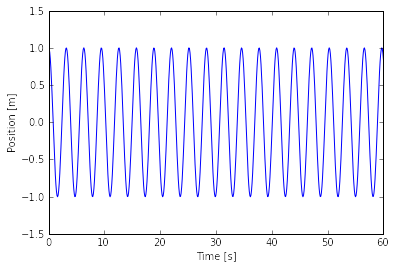

In [13]:
#plot of the oscilator
solver = ode('cvode', rhseqn, old_api=False)
times = linspace(0,60,600)
solution = solver.solve(times, initx)
plt.plot(solution.values.t,[x[0] for x in solution.values.y])
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.show()